In [1]:
import numpy as np
import pystan as ps

In [2]:
y = [1,0,0,0,1,1,0,0,0,1,0]
N=len(y)
dd={'y':y, 'N':N}

In [3]:
model="""
//Estimate the probability of success in a Bernoulli distribution
data {
  int N;                       //sample size
  int<lower=0,upper=1> y[N];   //y consists of N binary values (zeros and ones)
}
parameters {
  real<lower=0,upper=1> theta;  //parameter theta is constrained to be between 0 and 1
}
model {
  theta ~ beta(1,1);          //beta(1,1) is a uniform prior: all values between 0 and 1 equally likely 
  y ~ bernoulli(theta);       //Bernoulli likelihood given parameter theta
}
"""

In [4]:
stanfit = ps.stan(model_code=model, data=dd, iter=1000, chains=2)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_708e68c8e1bace44b404a1a9c6a1d9d1 NOW.


In [5]:
print("theta mean: {0:5.2f}".format(stanfit['theta'].mean()))

theta mean:  0.39


In [6]:
np.percentile(stanfit['theta'],[2.5,97.5])

array([ 0.15425695,  0.64683414])

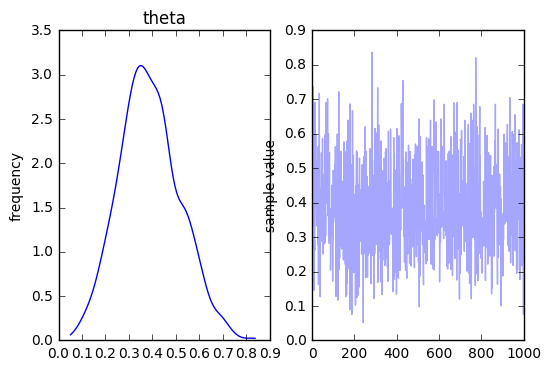

In [7]:
stanfit.plot()

In [12]:
%%bash
pwd

/home/gquinn/Desktop/html/stonehill/mth225/Spring2017/MTH225_Spring2017/notebooks
